In [30]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [31]:
global_temp = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')

In [44]:
global_temp = global_temp[['dt', 'City', 'AverageTemperature']]

global_temp['dt'] = pd.to_datetime(global_temp['dt'])
global_temp['year'] = global_temp['dt'].map(lambda x: x.year)
global_temp['month'] = global_temp['dt'].map(lambda x: x.month)
global_temp['City'] = global_temp['City']

def get_season(month):
    if month >= 3 and month <= 5:
        return 'spring'
    elif month >= 6 and month <= 8:
        return 'summer'
    elif month >= 9 and month <= 11:
        return 'autumn'
    else:
        return 'winter' 
    
min_year = global_temp['year'].min()
max_year = global_temp['year'].max()
years = range(min_year, max_year + 1)

'''if global_temp.month >= 3 and global_temp.month <= 5:
    global_temp['season'] = global_temp['month'].apply('spring')
elif global_temp.month >= 6 and global_temp.month <= 8:
    global_temp['season'] = global_temp['month'].apply('summer')
elif global_temp.month>= 9 and global_temp.month <= 11:
    global_temp['season'] = global_temp['month'].apply('autumn')
else:
    global_temp['season'] = global_temp['month'].apply('winter')'''
    
    

global_temp['season'] = global_temp['month'].apply(get_season)

spring_temps = []
summer_temps = []
autumn_temps = []
winter_temps = []

for year in years:
    curr_years_data = global_temp[global_temp['year'] == year]
    spring_temps.append(curr_years_data[curr_years_data['season'] == 'spring']['AverageTemperature'].mean())
    summer_temps.append(curr_years_data[curr_years_data['season'] == 'summer']['AverageTemperature'].mean())
    autumn_temps.append(curr_years_data[curr_years_data['season'] == 'autumn']['AverageTemperature'].mean())
    winter_temps.append(curr_years_data[curr_years_data['season'] == 'winter']['AverageTemperature'].mean())


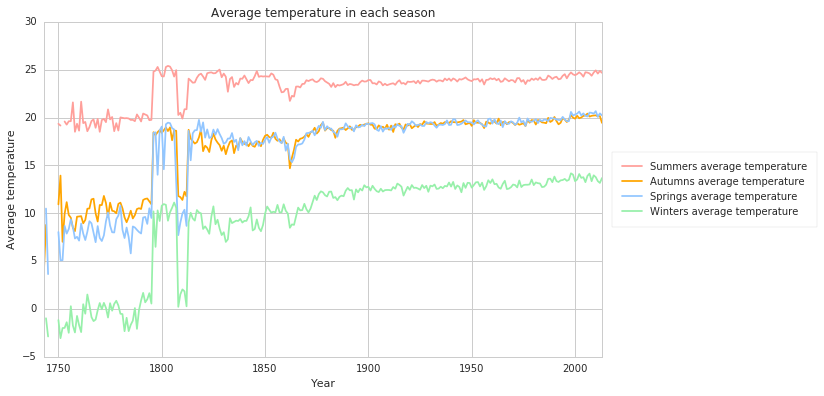

In [50]:
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(10, 6))

plt.plot(years, summer_temps, label='Summers average temperature', color='r')
plt.plot(years, autumn_temps, label='Autumns average temperature', color='orange')
plt.plot(years, spring_temps, label='Springs average temperature', color='b')
plt.plot(years, winter_temps, label='Winters average temperature', color='g')

plt.xlim(min_year, max_year)

ax.set_ylabel('Average temperature')
ax.set_xlabel('Year')
ax.set_title('Average temperature in each season')
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, borderpad=1, borderaxespad=1)

# Tempearture change of Delhi over the years

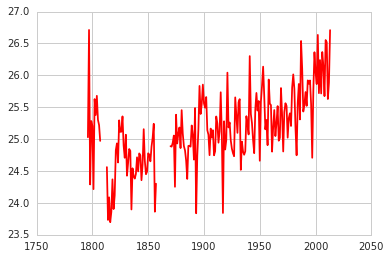

In [69]:
df= pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')
df_delhi = df[df['City']=='New Delhi']
combine = df[df['City']=='New Delhi'].groupby( df_delhi['dt'].apply(lambda x: int(x[0:4]))).mean()
comb= combine['AverageTemperature']
plt.plot(comb,color='red')
plt.show()


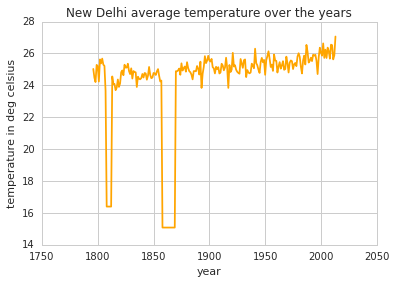

In [75]:
df_delhi['AverageTemperature'] = df_delhi['AverageTemperature'].fillna(method = 'ffill')
combined1 = df_delhi.groupby(df_delhi['dt'].apply(lambda x: int(x[0:4]))).mean()
temp=combined1['AverageTemperature']
plt.title('New Delhi average temperature over the years')
plt.ylabel('temperature in deg celsius')
plt.xlabel('year')
plt.plot(temp,color='orange')
plt.show()

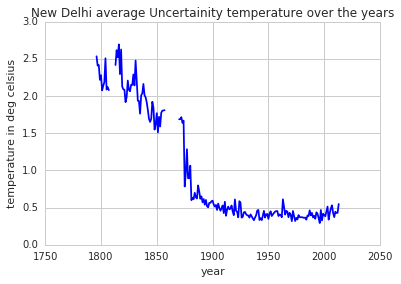

In [78]:
temp1=combined1['AverageTemperatureUncertainty']
plt.title('New Delhi average Uncertainity temperature over the years')
plt.ylabel('temperature in deg celsius')
plt.xlabel('year')
plt.plot(temp1,color='blue')
plt.show()